In [1]:
import pandas as pd
import numpy as np
import os
import sys

path_in = os.path.join("../Data")  # parent directory
np.random.seed(42)

import sys
sys.path.append(os.path.abspath(".."))  

from FinalToolModels.models import *
from FinalToolModels.simulate import *
from FinalToolModels.plot import *
from FinalToolModels.train import *
from FinalToolModels.split_dataset import *

%load_ext autoreload
%autoreload 2

# === Paths ===
###################### ======================== Case Study 1 ======================= ###########################

file_path = os.path.join(path_in, "dataset2.xlsx")
cs1 = pd.read_excel(file_path)

cs1["INDOOR_TEMP"] = cs1[["RTD31", "RTD34", "RTD37", "RTD40", "RTD41"]].mean(axis=1)
# Rename columns
rename_mapping = {
        'Tout': 'OUTDOOR_TEMP',
        'PhRad_actual_power': 'PHI_H',
        'SolGlob': 'PYRANOMETER'
    }
cs1 = cs1.rename(columns=rename_mapping)
# Convert 't' to datetime and set as index

cs1['Time'] = pd.to_datetime(cs1['Time'])
cs1 = cs1.set_index('Time')
cs1_surface_area = 100  # m² 
cs1 = cs1.iloc[0:960]

train_cs1, val_cs1, test_cs1 = split_dataset(cs1, testing_days=3, val_split=0.2)

### Train 1R1C, 2R2C, 3R2C, and 4R3C Models with Validation process

### 1R1C


=== Best result ===
Best Trial Validation #: 19
Best Trial Training #: 9
Best RMSE Validation: 0.3066
Best RMSE Training: 0.0525
Best initialization Validation: {'R_in_a': 0.19678687955672605, 'C_in': 23568417.166358493, 'Ain': 9.760584592567167}
Best initialization Training: {'R_in_a': 0.514720203975198, 'C_in': 296614869.8621592, 'Ain': 1.3944659311872116}
Best parameters Validation: {'R_in_a': 0.01420568672362954, 'C_in': 22791842.460672442, 'Ain': 0.37828371972969377, 'fh': 1, 'Objective': 0.05249728153056205, 'Solve_time': 0.024554967880249023}
Best parameters Training: {'R_in_a': 0.01420568672410647, 'C_in': 22791842.46323345, 'Ain': 0.37828371850011006, 'fh': 1, 'Objective': 0.05249728153035295, 'Solve_time': 0.03670668601989746}
Solve Time: 0.623316764831543


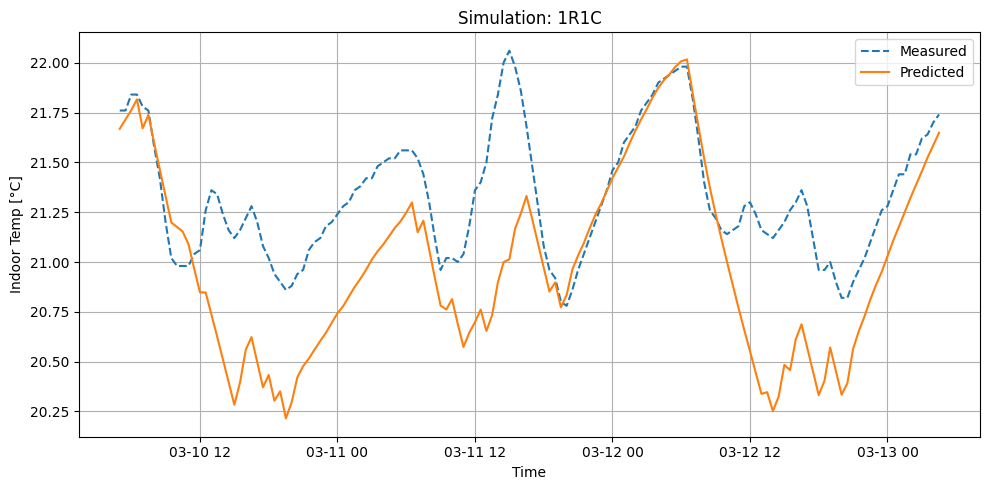

In [2]:
bounds_cs1 = {
        "R_in_a": (0.001, 1),
        "C_in": (1e6, 5e8),
        "Ain": (0.001, 0.3 * cs1_surface_area)
    }

model_1r1c_cs1, parameters, best_initialization, validation_pred_1r1c, initialize_testing, all_trials_1r1c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, val_df=val_cs1, model_type="1R1C", bounds=bounds_cs1, 
    num_trials=20, deltaT=1800, show_plot=False, log=False)

# --- Run Simulation for Testing ---
validation, t_pred_1r1c, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs1,
        param_dict=parameters,
        model_type="1R1C",
        initializations=initialize_testing,
        show_plot=True
    )


### 2R2C


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 1.2233
Trial RMSE Training: 0.4530
Trial initialization: {'R_e_a': 0.3892886123997925, 'R_in_e': 0.272077682742122, 'C_in': 414540017.06681275, 'C_e': 179019910.02010104, 'Ain': 8.428754356111735, 'Ae': 16.281339798664295, 'fh': 0.14092422497476265}
Trial parameters: {'R_in_e': 0.34276416135082527, 'R_e_a': 0.0022221039432861306, 'C_in': 2758478.5426647663, 'C_e': 499999591.70932215, 'Ain': 0.001000012317732057, 'Ae': 0.001026021301488237, 'fh': 0.013341255844490304, 'Objective': 0.45304642208239243, 'Solve_time': 0.18115592002868652}
Solve Time: 0.18115592002868652

 === Trial Result
Trial index #: 1
Trial RMSE Validation: 0.6721
Trial RMSE Training: 0.8982
Trial initialization: {'R_e_a': 0.8023947837732857, 'R_in_e': 0.07547609303609105, 'C_in': 493456581.36365813, 'C_e': 386350139.8790321, 'Ain': 5.962271730343638, 'Ae': 0.16665799159094838, 'fh': 0.8154614284548342}
Trial parameters: {'R_in_e': 0.999978574985048, 'R_e_a': 0

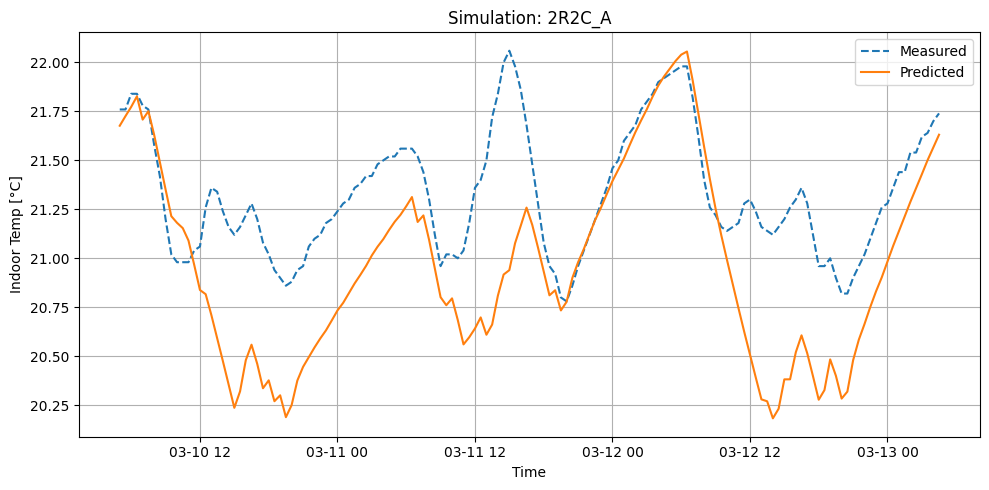

In [3]:
bounds_cs1 = {
    "R_e_a": (0.001, 1),
    "R_in_e": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.001, 0.3 * cs1_surface_area),
    "Ae": (0.001, 0.3 * cs1_surface_area),
    "fh": (0,1)
}

model_2r2c_cs1, parameters, best_initialization,validation_pred_2r2c, initialize_testing, all_trials_2r2c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, 
    val_df=val_cs1,
    model_type="2R2C_A", 
    bounds=bounds_cs1, 
    num_trials=20,
    deltaT=1800,
    show_plot=False,
    log=True)

# --- Run Simulation for Testing ---
validation, t_pred_2r2c, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs1,
        param_dict=parameters,
        model_type="2R2C_A",
        initializations=initialize_testing,
        show_plot=True
    )



#### 3R2C


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 0.2902
Trial RMSE Training: 0.0447
Trial initialization: {'R_in_e': 0.6423896145081335, 'R_e_a': 0.08505582503005378, 'R_in_a': 0.16246708538051916, 'C_in': 449378540.07501256, 'C_e': 303608100.7701354, 'Ain': 0.2760106287937278, 'Ae': 3.044236138826677, 'fh': 0.6635017691080558}
Trial parameters: {'R_in_e': 0.9999983663000903, 'R_e_a': 0.061228587646749814, 'R_in_a': 0.27452812443098107, 'C_in': 1038007.6324111266, 'C_e': 196282185.01937246, 'Ain': 0.033048447209405925, 'Ae': 0.0001251079400670204, 'fh': 0.04417844516911196, 'Objective': 0.044735774322974736, 'Solve_time': 0.5193631649017334}
Solve Time: 0.5193631649017334

 === Trial Result
Trial index #: 1
Trial RMSE Validation: 0.3263
Trial RMSE Training: 0.0457
Trial initialization: {'R_in_e': 0.006056522262372468, 'R_e_a': 0.16164724336608116, 'R_in_a': 0.5491850555772195, 'C_in': 346255703.6486539, 'C_e': 326328668.4917977, 'Ain': 6.728156856885847, 'Ae': 21.365405422503

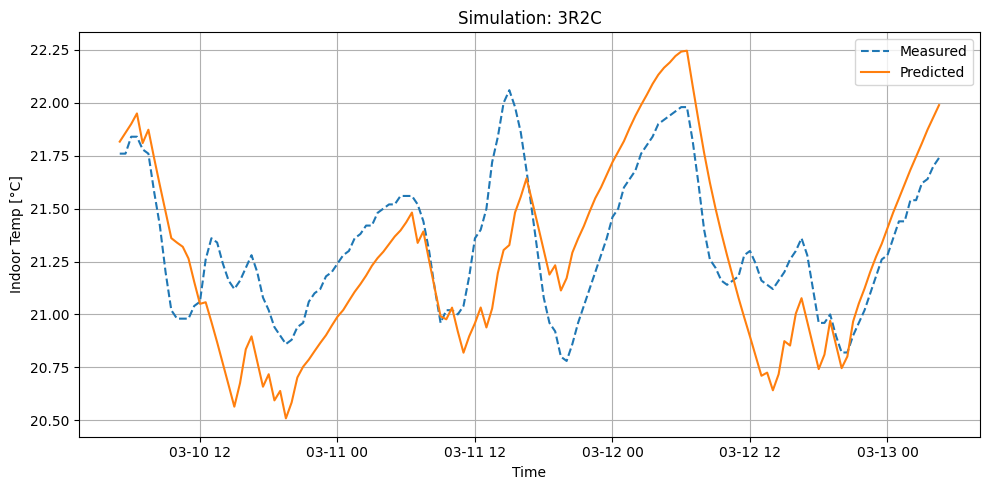

In [4]:
bounds_cs1 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs1_surface_area),
    "Ae": (0.0001, 0.3 * cs1_surface_area),
    "fh": (0,1)
}
model_3r2c_cs1, parameters, best_initialization, validation_pred_3r2c, initialize_testing, all_trials_3r2c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, 
    val_df=val_cs1,
    model_type="3R2C", 
    bounds=bounds_cs1, 
    num_trials=20,
    deltaT=1800,
    show_plot=False,
    log=True)

# --- Run Simulation for Testing ---
validation, t_pred_3r2c, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs1,
        param_dict=parameters,
        model_type="3R2C",
        initializations=initialize_testing,
        show_plot=True
    )


### 4R3C


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 1.1849
Trial RMSE Training: 0.0178
Trial initialization: {'R_int_in': 0.38939358635410887, 'R_in_e': 0.6440016420054685, 'R_e_a': 0.4593363847105336, 'R_in_a': 0.5465255557373031, 'C_int': 470802646.61773074, 'C_in': 193787995.7350262, 'C_e': 480641853.23536843, 'Aint': 27.160528723617716, 'Ain': 5.873814464565414, 'Ae': 2.0809320901248762, 'fh_int': 0.10077800137742665, 'fh_in': 0.018221825651549728, 'fh_e': 0.0944429607559284}
Trial parameters: {'R_int_in': 0.2001020376958728, 'R_in_e': 0.08331592333236747, 'R_e_a': 0.002665690591439473, 'R_in_a': 0.18636020879060955, 'C_int': 499999673.27751124, 'C_in': 1985615.4113235662, 'C_e': 102465172.02587266, 'Aint': 0.00012152918587471655, 'Ain': 0.5056705220676628, 'Ae': 0.00010737082959993969, 'fh_int': 3.6437915753414527e-07, 'fh_in': 0.09807003018642274, 'fh_e': 0.9019296054344197, 'Objective': 0.01777890874882097, 'Solve_time': 1.1475179195404053}
Solve Time: 1.1475179195404053


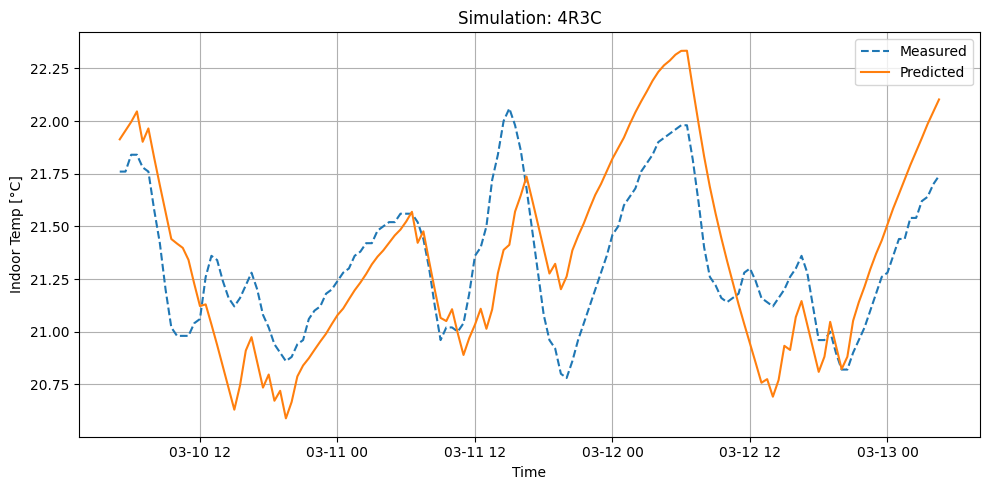

In [5]:
bounds_cs1 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs1_surface_area),
    "Ain": (0.0001, 0.3 * cs1_surface_area),
    "Ae": (0.0001, 0.3 * cs1_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}

model_4r3c_cs1, parameters, best_initialization, validation_pred_4r3c, initialize_testing, all_trials_4r3c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, 
    val_df=val_cs1,
    model_type="4R3C", 
    bounds=bounds_cs1, 
    num_trials=20,
    deltaT=1800,
    show_plot=False,
    log=True)

# --- Run Simulation for Testing ---
validation, t_pred_4r3c, t_true, test_pred = simulate_and_evaluate(
        val_df=test_cs1,
        param_dict=parameters,
        model_type="4R3C",
        initializations=initialize_testing,
        show_plot=True
    )

RMSE 1R1C 1R1C: 0.23 °C
RMSE 2R2C 1R1C: 0.22 °C
RMSE 3R2C 1R1C: 0.22 °C
RMSE 4R3C 1R1C: 0.21 °C


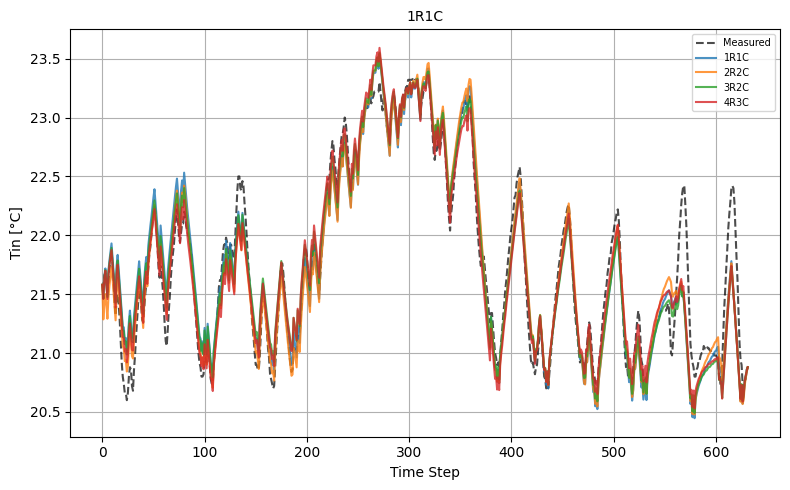

In [6]:
T_model_1r1c = np.array([model_1r1c_cs1.T_in[t]() for t in model_1r1c_cs1.T_in.index_set()])
T_model_2r2c = np.array([model_2r2c_cs1.T_in[t]() for t in model_2r2c_cs1.T_in.index_set()])
T_model_3r2c = np.array([model_3r2c_cs1.T_in[t]() for t in model_3r2c_cs1.T_in.index_set()])
T_model_4r3c = np.array([model_4r3c_cs1.T_in[t]() for t in model_4r3c_cs1.T_in.index_set()])
datasets=[train_cs1]
validation_dataset=[[T_model_1r1c,T_model_2r2c,T_model_3r2c, T_model_4r3c]]
labels = ['1R1C', '2R2C', '3R2C', '4R3C']
plot_model_validation(datasets,validation_dataset,labels, figsize=(8,5))

RMSE 1R1C 1R1C: 0.31 °C
RMSE 2R2C 1R1C: 0.32 °C
RMSE 3R2C 1R1C: 0.25 °C
RMSE 4R3C 1R1C: 0.26 °C


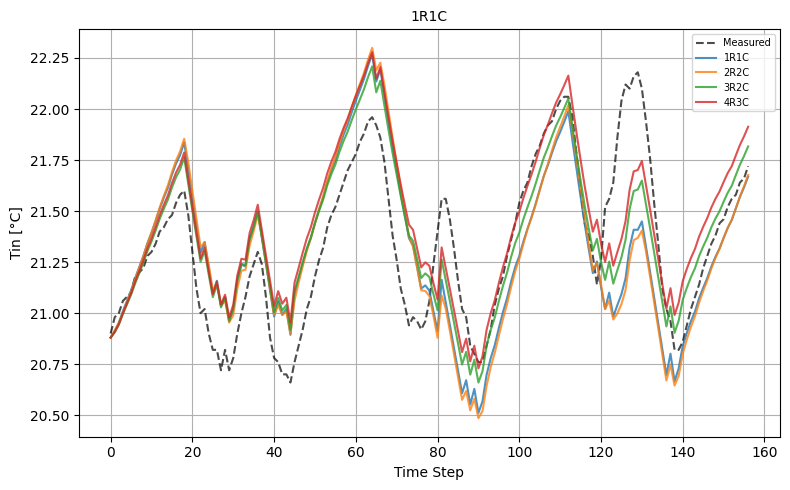

In [7]:
T_model_1r1c = np.array(validation_pred_1r1c['T_in_estimate'])
T_model_2r2c = np.array(validation_pred_2r2c['T_in_estimate'])
T_model_3r2c = np.array(validation_pred_3r2c['T_in_estimate'])
T_model_4r3c = np.array(validation_pred_4r3c['T_in_estimate'])
datasets=[val_cs1]
validation_dataset=[[T_model_1r1c,T_model_2r2c,T_model_3r2c, T_model_4r3c]]
labels = ['1R1C', '2R2C', '3R2C', '4R3C']
plot_model_validation(datasets,validation_dataset,labels, figsize=(8,5))

RMSE 1R1C 1R1C: 0.45 °C
RMSE 2R2C 1R1C: 0.49 °C
RMSE 3R2C 1R1C: 0.29 °C
RMSE 4R3C 1R1C: 0.30 °C


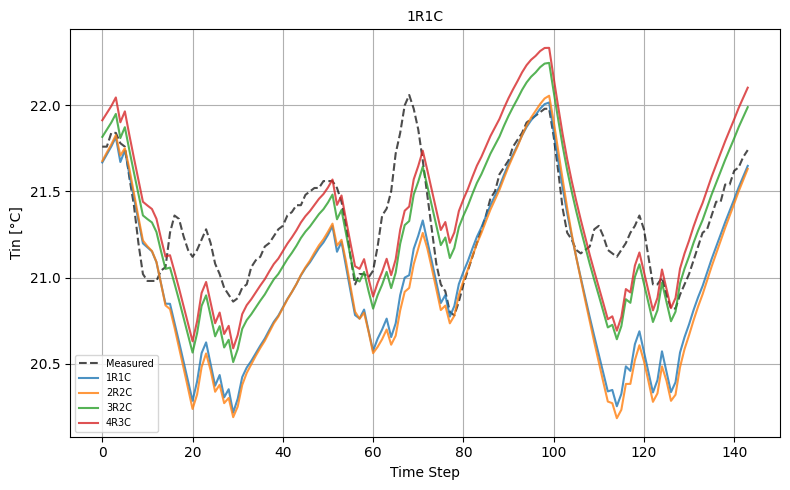

In [8]:
datasets=[test_cs1]
validation_dataset=[[t_pred_1r1c,t_pred_2r2c,t_pred_3r2c, t_pred_4r3c]]
labels = ['1R1C', '2R2C', '3R2C', '4R3C']
plot_model_validation(datasets,validation_dataset,labels, figsize=(8,5))

In [ ]:
cases = ['CS1']
models = ['1r1c', '2r2c', '3r2c', '4r3c']
solve_times = {
    '1r1c': [all_trials_1r1c_cs1['Solve_time'].sum()],
    '2r2c': [all_trials_2r2c_cs1['Solve_time'].sum()],
    '3r2c': [all_trials_3r2c_cs1['Solve_time'].sum()],
    '4r3c': [all_trials_4r3c_cs1['Solve_time'].sum()],
}

# Bar plot settings
x = np.arange(len(cases))
width = 0.18
colors = ['#4c72b0', '#55a868', '#c44e52', "#0d0c11"]

fig, ax = plt.subplots(figsize=(8, 4.5))

for i, model in enumerate(models):
    ax.bar(x + i * width, solve_times[model], width, label=model, color=colors[i])

# Axis formatting
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(cases)
ax.set_ylabel("Solve Time (s)")
ax.set_xlabel("Case Study")
# ax.set_title("Comparison of Solve Time Across Models and Case Studies", fontsize=13, pad=10)

# Style
ax.legend(frameon=False)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

NameError: name 'all_trials_1r1c_cs1' is not defined